# STUDENT PERFORMANCE ANALYSIS


## From this dataset, we will analyse the influence of parents background,test preparation,etc. on the performance of the student

In [136]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [137]:
# Loading the Dataset

df = pd.read_csv('StudentsPerformance.csv')

In [138]:
# Checking the first five rows of the dataset

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [139]:
# Checking the number of rows and columns in the dataset

df.shape

(1000, 8)

In [140]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [141]:
# Checking the datatypes 

df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### We find that gender,race, parental level of education, lunch,test-preparation course are the categorical Variables

In [142]:
df.iloc[0,:]

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object

In [143]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### There are more number of males than females in the dataset

In [144]:
df.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [145]:
df.groupby('gender')['reading score'].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [146]:
df.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

### On an average,we find that males score more in maths than females. 
### Females score more in both reading and writing than males


In [147]:
# Checking the stats of numerical columns

num_cols = ['math score','reading score', 'writing score']
df[num_cols].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [148]:
# Checking for the number of null values
pd.isnull(df).sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no null values in the data

In [149]:
#Checking the different categories in each categorical variable of the dataframe
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [150]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


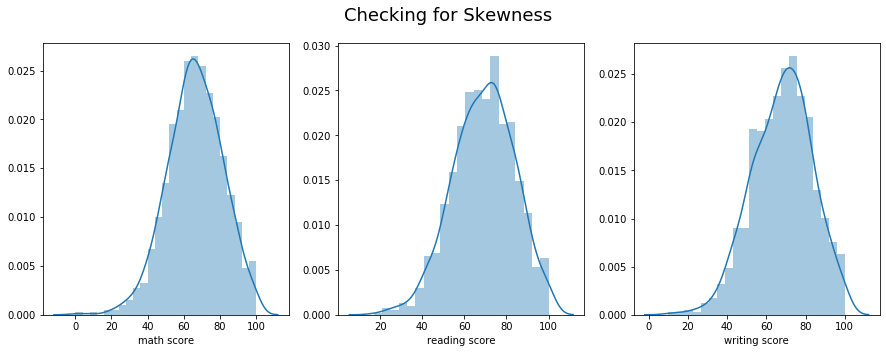

In [151]:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

### No Such Skewness is there

In [152]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [153]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [154]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


In [155]:
total_students = df.shape[0]
number_of_students_passing_in_all_subjects = df[(df['math score'] > 40) &
                                                  (df['writing score'] > 40) & 
                                                  (df['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


In [156]:
df.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [157]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### Reading and Writing Score have very high positive correlation. That is, if a student scores high in reading, then he/she has a higher probability of scoring more in writing too.

In [158]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [159]:
df.rename(columns = {'math score':'math_score','reading score':'reading_score','writing score':'writing_score'}, inplace = True) 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [160]:
df_gender = pd.get_dummies(df['gender'])

In [161]:
df_new = pd.concat([df, df_gender], axis=1)

In [162]:
df_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,male,group C,some college,standard,none,76,78,75,0,1


In [163]:
df_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,male,group C,some college,standard,none,76,78,75,0,1


In [172]:
df_new.rename(columns = {'parental level of education':'parental_level_of_education'}, inplace = True) 

In [173]:
df_new.head()
df = df_new.copy()

In [174]:
df.groupby('parental_level_of_education')['reading_score','math_score','writing_score'].mean()

,reading_score,math_score,writing_score
parental_level_of_education,,,
associate's degree,70.927928,67.882883,69.896396
bachelor's degree,73.000000,69.389831,73.381356
high school,64.704082,62.137755,62.448980
master's degree,75.372881,69.745763,75.677966
some college,69.460177,67.128319,68.840708
some high school,66.938547,63.497207,64.888268


### We find that students whose parents who hold a master's degree score more in all the three tests. 

In [175]:
plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

### Very less parents have a master's degree, but still their kids score highest.

In [176]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

<Figure size 1296x576 with 0 Axes>

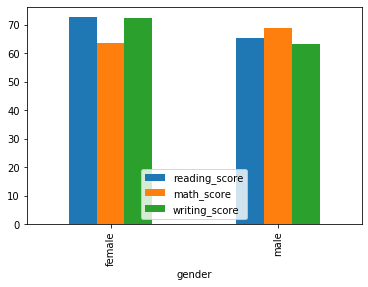

In [177]:
plt.figure(figsize=(18,8))
df.groupby('gender')['reading_score','math_score','writing_score'].mean().plot.bar()

In [178]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,male,group C,some college,standard,none,76,78,75,0,1


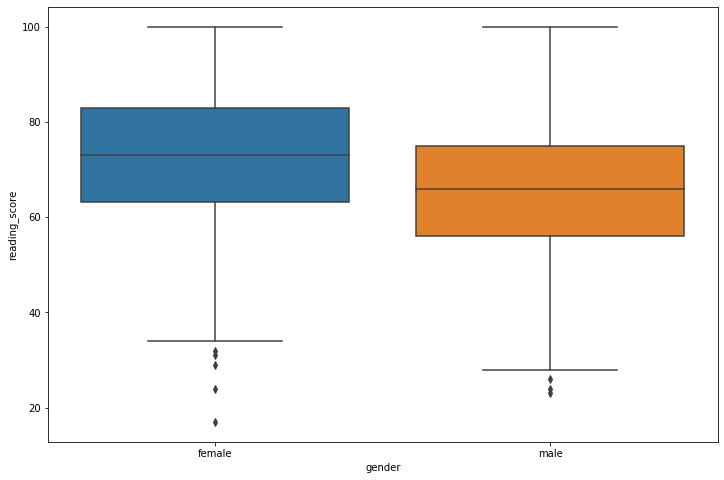

In [179]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='reading_score',data=df)

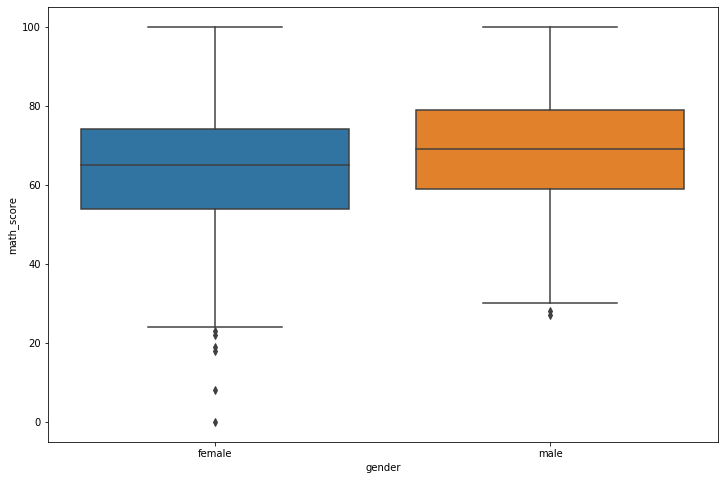

In [181]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='math_score',data=df)

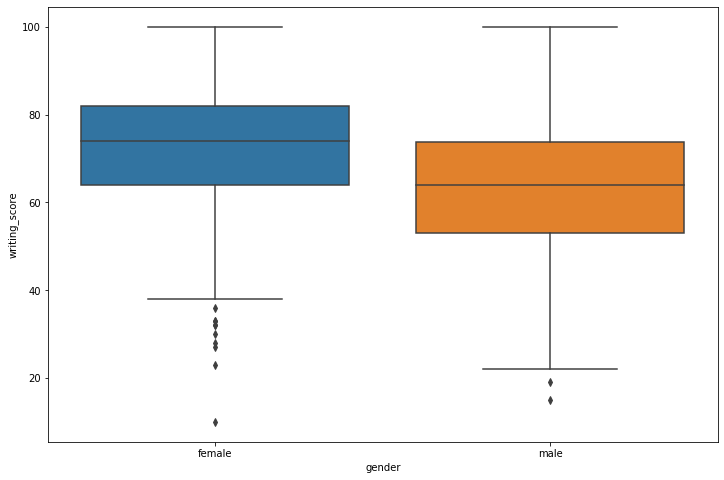

In [182]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='writing_score',data=df)

In [184]:
df_p = pd.get_dummies(df['parental_level_of_education'])

In [185]:
df_new = pd.concat([df, df_p], axis=1)

In [186]:
df = df_new.copy()

In [187]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,0,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,1,0,0,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,0,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,1,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,1,0,0,0,0,1,0


In [191]:
df.corr()

,math_score,reading_score,writing_score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math_score,1.000000,0.817580,0.802642,-0.167982,0.167982,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852
reading_score,0.817580,1.000000,0.954598,0.244313,-0.244313,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369
writing_score,0.802642,0.954598,1.000000,0.301225,-0.301225,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326
female,-0.167982,0.244313,0.301225,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990
male,0.167982,-0.244313,-0.301225,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990
associate's degree,0.063228,0.064386,0.064799,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426
bachelor's degree,0.079664,0.096024,0.128297,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790
high school,-0.128725,-0.151068,-0.182211,-0.037952,0.037952,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545
master's degree,0.060417,0.106452,0.125693,0.046188,-0.046188,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,-0.116919
some college,0.037056,0.010782,0.027989,0.004460,-0.004460,-0.288649,-0.197647,-0.266799,-0.135305,1.000000,-0.252312


In [196]:
df_r = pd.get_dummies(df['test preparation course'])
df_new = pd.concat([df, df_r], axis=1)
df = df_new.copy()
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score,female,male,...,master's degree,some college,some high school,group A,group B,group C,group D,group E,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,...,0,0,0,0,1,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,1,0,0,0,1,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,...,1,0,0,0,1,0,0,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,0,0,0,1,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,1,0,0,0,1,0,0,0,1


In [197]:
df.corr()

,math_score,reading_score,writing_score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,completed,none
math_score,1.000000,0.817580,0.802642,-0.167982,0.167982,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.177702,-0.177702
reading_score,0.817580,1.000000,0.954598,0.244313,-0.244313,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.241780,-0.241780
writing_score,0.802642,0.954598,1.000000,0.301225,-0.301225,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.312946,-0.312946
female,-0.167982,0.244313,0.301225,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,-0.071001,0.028466,0.063368,-0.030566,-0.020302,-0.006028,0.006028
male,0.167982,-0.244313,-0.301225,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.071001,-0.028466,-0.063368,0.030566,0.020302,0.006028,-0.006028
associate's degree,0.063228,0.064386,0.064799,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.048658,-0.007238,0.037077,-0.044674,0.054922,0.012668,-0.012668
bachelor's degree,0.079664,0.096024,0.128297,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.016307,-0.019121,0.015682,-0.020556,0.013221,0.024285,-0.024285
high school,-0.128725,-0.151068,-0.182211,-0.037952,0.037952,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.074446,0.074446
master's degree,0.060417,0.106452,0.125693,0.046188,-0.046188,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.033551,-0.056363,0.001630,0.072793,-0.003180,-0.009933,0.009933
some college,0.037056,0.010782,0.027989,0.004460,-0.004460,-0.288649,-0.197647,-0.266799,-0.135305,1.000000,-0.252312,-0.017751,-0.036203,-0.015872,0.042347,0.023153,-0.019490,0.019490


## Students who have completed a test prepartion course score much more than those who have done no preparation course 

In [198]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score,female,male,...,master's degree,some college,some high school,group A,group B,group C,group D,group E,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,...,0,0,0,0,1,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,1,0,0,0,1,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,...,1,0,0,0,1,0,0,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,0,0,0,1,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,1,0,0,0,1,0,0,0,1


In [200]:
df_l = pd.get_dummies(df['lunch'])
df_new = pd.concat([df, df_l], axis=1)
df = df_new.copy()
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score,female,male,...,group B,group C,group D,group E,completed,none,completed,none,free/reduced,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,...,1,0,0,0,0,1,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,1,0,0,1,0,1,0,0,1
2,female,group B,master's degree,standard,none,90,95,93,1,0,...,1,0,0,0,0,1,0,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,0,0,0,0,0,1,0,1,1,0
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,1,0,0,0,1,0,1,0,1


In [201]:
df.corr()

,math_score,reading_score,writing_score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,...,group B,group C,group D,group E,completed,none,completed,none,free/reduced,standard
math_score,1.000000,0.817580,0.802642,-0.167982,0.167982,0.063228,0.079664,-0.128725,0.060417,0.037056,...,-0.084250,-0.073387,0.050071,0.205855,0.177702,-0.177702,0.177702,-0.177702,-0.350877,0.350877
reading_score,0.817580,1.000000,0.954598,0.244313,-0.244313,0.064386,0.096024,-0.151068,0.106452,0.010782,...,-0.060283,-0.003074,0.035177,0.106712,0.241780,-0.241780,0.241780,-0.241780,-0.229560,0.229560
writing_score,0.802642,0.954598,1.000000,0.301225,-0.301225,0.064799,0.128297,-0.182211,0.125693,0.027989,...,-0.078254,-0.010203,0.082032,0.089077,0.312946,-0.312946,0.312946,-0.312946,-0.245769,0.245769
female,-0.167982,0.244313,0.301225,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,...,0.028466,0.063368,-0.030566,-0.020302,-0.006028,0.006028,-0.006028,0.006028,0.021372,-0.021372
male,0.167982,-0.244313,-0.301225,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,...,-0.028466,-0.063368,0.030566,0.020302,0.006028,-0.006028,0.006028,-0.006028,-0.021372,0.021372
associate's degree,0.063228,0.064386,0.064799,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,...,-0.007238,0.037077,-0.044674,0.054922,0.012668,-0.012668,0.012668,-0.012668,-0.009102,0.009102
bachelor's degree,0.079664,0.096024,0.128297,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,...,-0.019121,0.015682,-0.020556,0.013221,0.024285,-0.024285,0.024285,-0.024285,0.013668,-0.013668
high school,-0.128725,-0.151068,-0.182211,-0.037952,0.037952,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,...,0.069093,0.007977,-0.042118,-0.039494,-0.074446,0.074446,-0.074446,0.074446,0.002211,-0.002211
master's degree,0.060417,0.106452,0.125693,0.046188,-0.046188,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,...,-0.056363,0.001630,0.072793,-0.003180,-0.009933,0.009933,-0.009933,0.009933,0.027095,-0.027095
some college,0.037056,0.010782,0.027989,0.004460,-0.004460,-0.288649,-0.197647,-0.266799,-0.135305,1.000000,...,-0.036203,-0.015872,0.042347,0.023153,-0.019490,0.019490,-0.019490,0.019490,-0.006146,0.006146


## Students who have a standard lunch score more as predicted by the correlation

# Conclusions from Data Analysis

   1. On an average, females score more than the males in the test.
   2. Education level of the parents have a direct impact on their child's performance. Parents who went only to a high school imapcts negatively on the child's performance. In contrary,students of highly qualified parents such as those who own a master's degree impacts positively.
   3. 93.90% of students pass all the three subjects.
   4. Students who have well prepared for the test through courses, score much higher than those who dont't. Thus, it is a very important factor in determining the score of the students.
   5. Students having a standard lunch score more than those who have free/reduced lunch. Thus ,we can say that nutrition also has a direct impact on the performance of the student